# Histograms, histogram equalization, histogram matching

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

## Histograms and CMF (Cumulative distribution function)

Histogram is a graphical representation of frequency of our data (using bars or rectangles).

In the following lines of code, we will:
1. create random grayscale 20x20 pixels image
1. create and plot histogram
1. create and plot CDF

In [3]:
img = np.random.rand(20,20) # 20 x 20 matrix of uniformly distributed nubers from [0,1)

In [5]:
BINS = 50 # number of bins for histogram
hist, bins = np.histogram(img.flatten(), bins=BINS)
cdf = hist.cumsum()

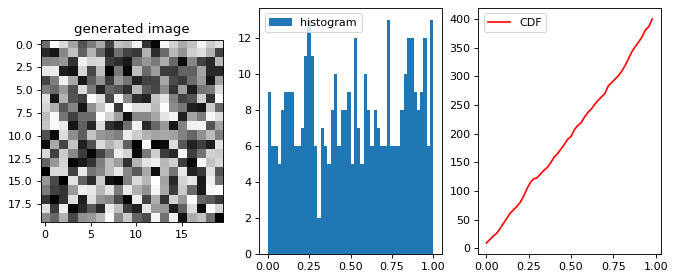

In [6]:
plt.figure(figsize=(10,4), dpi=80)

plt.subplot(131)
plt.imshow(img, cmap="gray")
plt.title(("generated image"))

plt.subplot(132)
plt.hist(img.flatten(), bins=BINS, label="histogram")
plt.legend()

plt.subplot(133)
plt.plot(bins[:-1], hist.cumsum(), color="r", label="CDF")
plt.legend()

## Histogram equalization

Our vague definition:
> Histogram equalization is a method which modifies **contrast** of our image by manipulating its histogram.

Our algorithm:
> Histogram equalization is a function which maps original image to transformed image (pixel by pixel).


Example:
1. load an image from 'data/L.jpg'
1. convert loaded image to grayscale
1. plot histogram and CDF, CDF is normalized (between 0,1)

In [7]:
img = cv.imread(os.path.join("data", "P.jpg"))
grayscaled = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [8]:
BINS = 50
hist, bins = np.histogram(grayscaled.flatten(), bins=BINS)
cdf = hist.cumsum()
cdf_normalized = cdf / len(grayscaled.flatten())

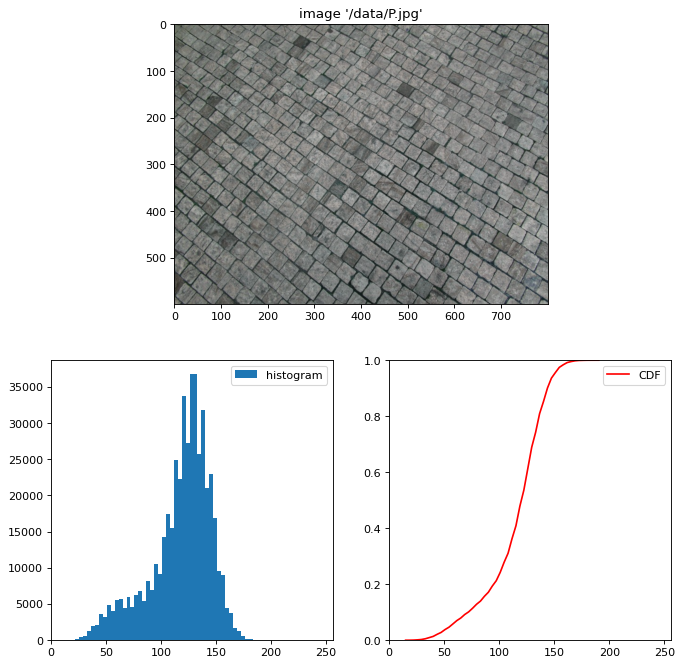

In [9]:
plt.figure(figsize=(10,10), dpi=80)

plt.subplot(211)
plt.imshow(img, cmap="gray")
plt.title(("image '/data/P.jpg'"))

plt.subplot(223)
plt.hist(grayscaled.flatten(), bins=50, label="histogram")
plt.xlim((0,256))
plt.legend()

plt.subplot(224)
plt.plot(bins[:-1], cdf_normalized, color="r", label="CDF")
plt.xlim((0,256))
plt.ylim((0,1))
plt.legend()

### Increase image contrast using look up table

We will show magic function from `opencv`, you will do the same thing by creating your own LUT algorithm.

In [10]:
equ = cv.equalizeHist(grayscaled) # equalize `grayscaled`
hist_equ, bins_equ = np.histogram(equ, bins=50)
cdf_equ = hist_equ.cumsum()
cdf_normalized_equ = cdf_equ / len(equ.flatten())

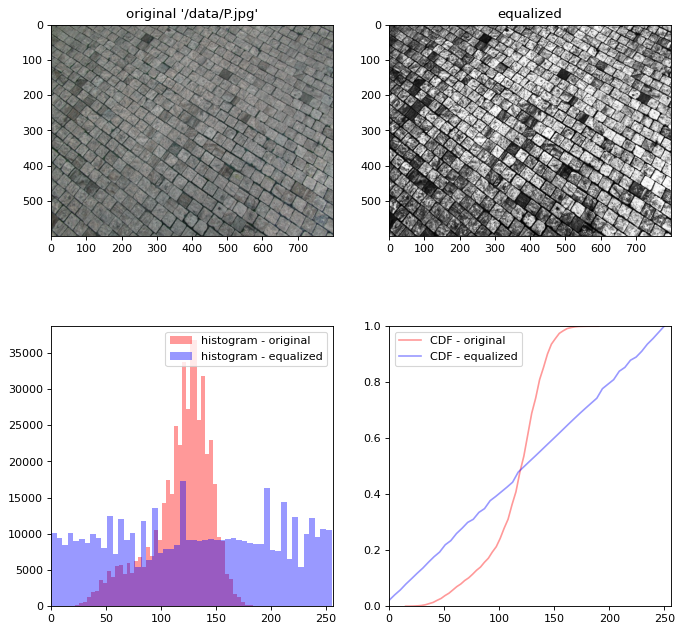

In [11]:
plt.figure(figsize=(10,10), dpi=80)

plt.subplot(221)
plt.imshow(img, cmap="gray")
plt.title(("original '/data/P.jpg'"))

plt.subplot(222)
plt.imshow(equ, cmap="gray")
plt.title(("equalized"))

plt.subplot(223)
plt.hist(grayscaled.flatten(), bins=50, alpha=0.4, color="r", label="histogram - original")
plt.hist(equ.flatten(), bins=50, alpha=0.4, color="b", label="histogram - equalized")
plt.xlim((0,256))
plt.legend()

plt.subplot(224)
plt.plot(bins[:-1], cdf_normalized, alpha=0.4, color="r", label="CDF - original")
plt.plot(bins_equ[:-1], cdf_normalized_equ, alpha=0.4, color="b", label="CDF - equalized")
plt.xlim((0,256))
plt.ylim((0,1))
plt.legend()

### Restricted histogram equalisation

If we would try naive LUT algorithm (your homework) on the following image, result should look something like this:

![example2](data/hw2_example.svg)

Our naive LUT algorithm crates so called *aratefacts*. Your second part of homework will be to create and implement algorithm which will adress this issue.

In [12]:
img = cv.imread(os.path.join("data", "L.jpg"))
grayscaled = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [13]:
BINS = 50
hist, bins = np.histogram(grayscaled.flatten(), bins=BINS)
cdf = hist.cumsum()
cdf_normalized = cdf / len(grayscaled.flatten())

In [14]:
equ = cv.equalizeHist(grayscaled)
hist_equ, bins_equ = np.histogram(equ, bins=BINS)
cdf_equ = hist_equ.cumsum()
cdf_normalized_equ = cdf_equ / len(equ.flatten())

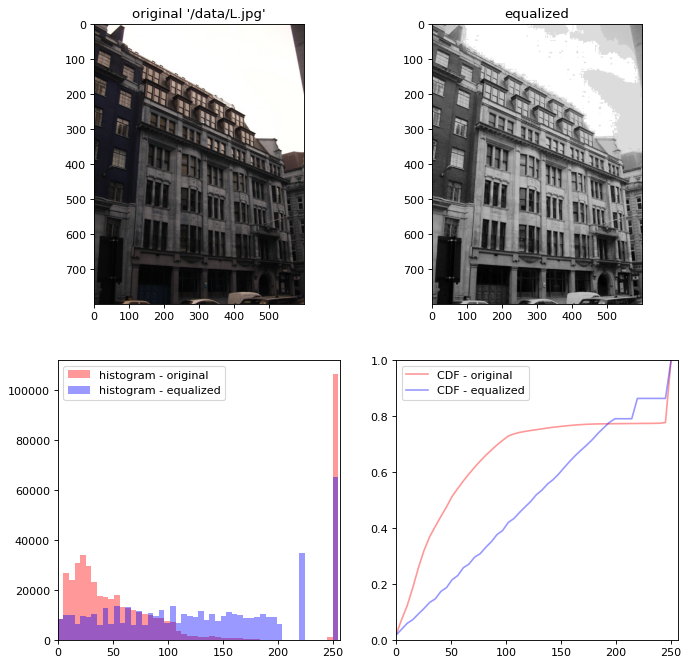

In [15]:
plt.figure(figsize=(10,10), dpi=80)

plt.subplot(221)
plt.imshow(img, cmap="gray")
plt.title(("original '/data/L.jpg'"))

plt.subplot(222)
plt.imshow(equ, cmap="gray")
plt.title(("equalized"))

plt.subplot(223)
plt.hist(grayscaled.flatten(), bins=50, alpha=0.4, color="r", label="histogram - original")
plt.hist(equ.flatten(), bins=50, alpha=0.4, color="b", label="histogram - equalized")
plt.xlim((0,256))
plt.legend()

plt.subplot(224)
plt.plot(bins[:-1], cdf_normalized, alpha=0.4, color="r", label="CDF - original")
plt.plot(bins_equ[:-1], cdf_normalized_equ, alpha=0.4, color="b", label="CDF - equalized")
plt.xlim((0,256))
plt.ylim((0,1))
plt.legend()

##  Histogram matching

Last topic will be about **histogram matching**. Such an algorithm transforms original image so that the transformed image histogram matches some reference.

In [16]:
def calculate_lookup(src_cdf, ref_cdf):
    lookup_table = np.zeros(256)
    lookup_val = 0
    for src_pixel_val in range(len(src_cdf)):
        lookup_val
        for ref_pixel_val in range(len(ref_cdf)):
            if ref_cdf[ref_pixel_val] >= src_cdf[src_pixel_val]:
                lookup_val = ref_pixel_val
                break
        lookup_table[src_pixel_val] = lookup_val
    return lookup_table

In [17]:
image = cv.imread(os.path.join("data", "CM1.jpg"))
img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
reference = cv.imread(os.path.join("data", "CM2.jpg"))
ref = cv.cvtColor(reference, cv.COLOR_BGR2GRAY)

In [18]:
BINS = 256
hist, bins = np.histogram(img.flatten(), bins=BINS)
cdf = hist.cumsum()
cdf_normalized = cdf / len(img.flatten())
hist_r, bins_r = np.histogram(ref.flatten(), bins=BINS)
cdf_r = hist_r.cumsum()
cdf_normalized_r = cdf_r / len(ref.flatten())

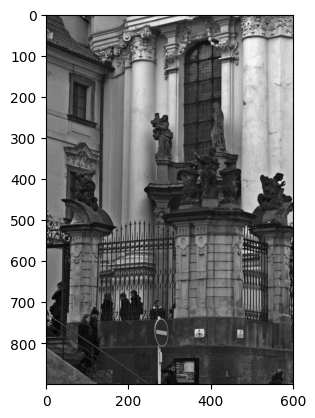

In [19]:
plt.imshow(ref, cmap="gray")

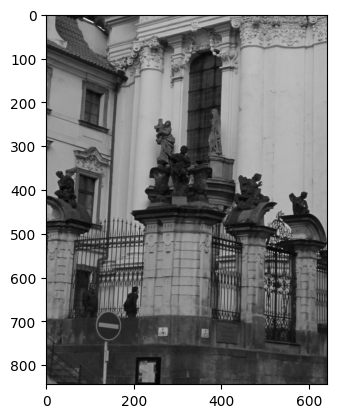

In [20]:
plt.imshow(img, cmap="gray")

In [21]:
lut = calculate_lookup(cdf_normalized, cdf_normalized_r)

In [29]:
transformed = cv.LUT(img, lut)
hist_t, bins_t = np.histogram(transformed.flatten(), bins=BINS)
cdf_t = hist_t.cumsum()
cdf_normalized_t = cdf_t / len(transformed.flatten())

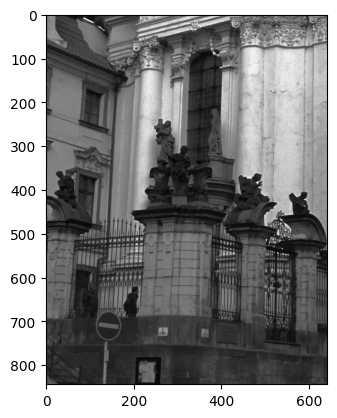

In [30]:
plt.imshow(transformed, cmap="gray")

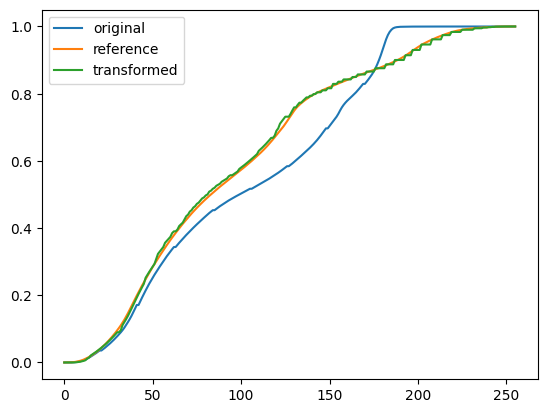

In [35]:
plt.plot(cdf_normalized, label="original")
plt.plot(cdf_normalized_r, label="reference")
plt.plot(cdf_normalized_t, label="transformed")
plt.legend()

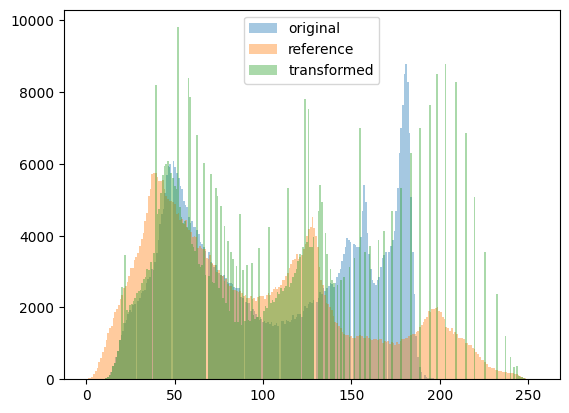

In [37]:
plt.hist(img.flatten(), alpha=0.4, bins=256, label="original")
plt.hist(ref.flatten(), alpha=0.4, bins=256, label="reference")
plt.hist(transformed.flatten(), alpha=0.4, bins=256, label="transformed")
plt.legend()